In [1]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
def load_all_np_data_label(pathes):
    all_data, all_label = None, None
    for path in pathes:
        data, label = np.load(path + "_data.npy"), np.load(path + "_label.npy")
        label = label.reshape((-1,)).astype('float32')
        if all_data is None:
            all_data, all_label = data, label
        else:
            all_data = np.concatenate([all_data, data], dim=0)
            all_label = nd.concatenate([all_label, label], dim=0)
    return all_data, all_label

## 1.0 show image example

In [ ]:
adverse_data, adverse_label = load_all_np_data_label(['/home/hui/dataset/CIFAR10/arraydataset/npy/backgrad_resnet18_me_200e_iter10_clip'])
origin_data, adverse_label = load_all_np_data_label(['/home/hui/dataset/CIFAR10/arraydataset/npy/origin'])
plt.subplot(121)
plt.imshow(origin_data[0] / 255)
plt.title('origin')
plt.subplot(122)
plt.title('adverse')
plt.imshow(adverse_data[0] / 255)

In [ ]:
import sys
sys.path.insert(0, '../../utils')
from cifar10_utils import show_images
show_images(origin_data[0:5].transpose((0, 3, 1, 2)), clip=False)
show_images(adverse_data[0:5].transpose((0, 3, 1, 2)), clip=False)

## 1.1 TSNE simple example

finish!


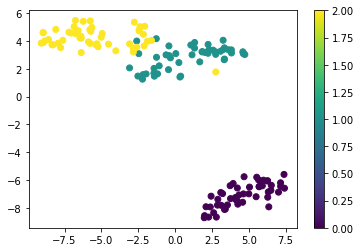

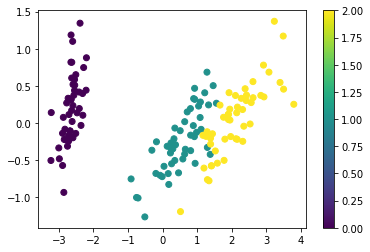

In [10]:
import os
import sys
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

class chj_data(object):
    def __init__(self, data, target):
        self.data = data
        self.target = target
        
data, target = load_iris(True)
X_tsne = TSNE(n_components=2, learning_rate=100).fit_transform(data)
X_pca = PCA().fit_transform(data)
print("finish!")
#plt.figure(figsize=(12, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=target)
plt.colorbar()
plt.show()

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=target)
plt.colorbar()
plt.show()

## 1.2 view image of origin and adverse data

In [2]:
adverse_data, adverse_label = load_all_np_data_label(['/home/hui/dataset/CIFAR10/arraydataset/npy/backgrad_resnet18_me_200e_iter10_clip'])
origin_data, adverse_label = load_all_np_data_label(['/home/hui/dataset/CIFAR10/arraydataset/npy/origin'])

In [16]:
import os
import sys
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random
def get_random_idx(all_data_count, return_data_count):
    random_idx = range(0, all_data_count)
    random.shuffle(random_idx)
    idx = np.array(random_idx[:return_data_count])
    return idx

def show_TSNE2(X_tsne, Y):
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y)
    plt.colorbar()
    plt.show()

s = adverse_data[0].shape
ivl = image_vector_lenth = s[0] * s[1] * s[2]

## 1.2.1 origin image and adverse image almost coincide  by random choose 500 images

In [39]:
count = 2000
idx = get_random_idx(50000, count)
#idx = range(count)
X = np.zeros(shape=(count * 2, ivl))
X[:count, :] = adverse_data[idx, :, :, :].reshape((count, -1))
X[count:, :] = origin_data[idx, :, :, :].reshape((count, -1))
Y = np.array([0] * count + [1] * count)
X_tsne = TSNE(n_components=2, learning_rate=100).fit_transform(X)

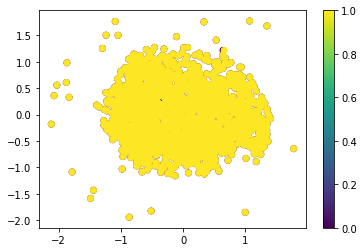

In [40]:
show_TSNE2(X_tsne, Y)

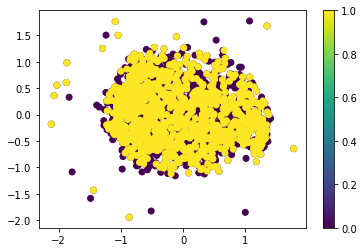

In [44]:
show_TSNE2(X_tsne[:3000], Y[:3000])

## 1.2.2 origin image and adverse image almost coincide  by choose 500 images of class 0

In [31]:
count = 500
idx = range(count)
X = np.zeros(shape=(count * 2, ivl))
X[:count, :] = adverse_data[idx, :, :, :].reshape((count, -1))
X[count:, :] = origin_data[idx, :, :, :].reshape((count, -1))
Y = np.array([0] * 500 + [1] * 500)
X_tsne = TSNE(n_components=2, learning_rate=100).fit_transform(X)

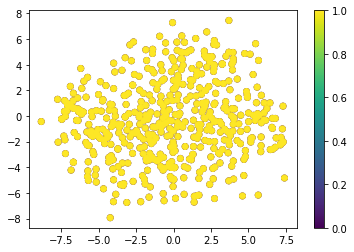

In [32]:
show_TSNE2(X_tsne, Y)

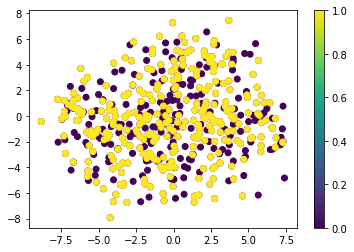

In [33]:
show_TSNE2(X_tsne[:800], Y[:800])

In [36]:
count = 500
idx = range(count) + range(5000, 5000 + count)
# X[:count, :] = adverse_data[idx, :, :, :].reshape((count, -1))
X = origin_data[idx, :, :, :].reshape((count * 2, -1))
Y = np.array([0] * 500 + [1] * 500)
X_tsne = TSNE(n_components=2, learning_rate=100).fit_transform(X)

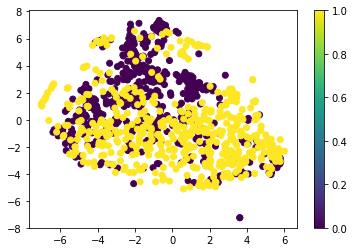

In [37]:
show_TSNE2(X_tsne, Y)